In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# displaying all columns/rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('BA_reviews.csv')
# removing the unnamed:0 column
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Reviews,Trip Verified,Overall Rating
0,A320,Business,Economy Class,London to Basel,January 2025,1.0,3.0,2.0,1.0,1.0,NaN,1,no,✅ Trip Verified | The check in process and rew...,True,1
1,NaN,Family Leisure,Economy Class,London to Phoenix,November 2023,2.0,2.0,2.0,2.0,1.0,NaN,1,no,"✅ Trip Verified | We flew in November 2023, ...",True,1
2,NaN,Family Leisure,Economy Class,London to Johannesburg,January 2025,1.0,1.0,2.0,3.0,1.0,NaN,1,no,✅ Trip Verified | I left for London from Johan...,True,1
3,A380,Solo Leisure,Business Class,London to Cape Town via Johannesburg,December 2024,3.0,4.0,4.0,1.0,3.0,NaN,3,yes,✅ Trip Verified | After an excellent flight ...,True,5
4,NaN,Family Leisure,Economy Class,Larnaca to Glasgow via Heathrow,November 2024,1.0,1.0,1.0,2.0,1.0,NaN,1,no,✅ Trip Verified | On a recent flight from Cy...,True,1


In [3]:
len(df)

2000

In [4]:
# Number of verified trips
verified = df[df['Trip Verified'] == True]
len(verified)

1696

In [5]:
df.dtypes

Aircraft                   object
Type Of Traveller          object
Seat Type                  object
Route                      object
Date Flown                 object
Seat Comfort              float64
Cabin Staff Service       float64
Food & Beverages          float64
Inflight Entertainment    float64
Ground Service            float64
Wifi & Connectivity       float64
Value For Money             int64
Recommended                object
Reviews                    object
Trip Verified                bool
Overall Rating              int64
dtype: object

In [6]:
# Saving important stats for analysis
stats = df[["Seat Comfort", "Cabin Staff Service", "Food & Beverages", "Inflight Entertainment", "Ground Service", "Wifi & Connectivity", "Value For Money", "Overall Rating"]] 
overall = df["Overall Rating"]

In [7]:
# Counting the number of missing values in the stats columns. 
stats.isnull().sum()

Seat Comfort               113
Cabin Staff Service        128
Food & Beverages           382
Inflight Entertainment     879
Ground Service              68
Wifi & Connectivity       1486
Value For Money              0
Overall Rating               0
dtype: int64

In [8]:
# Null values will be ignored in .describe(), therefore some columns will have lower/higher counts than other.
#stats.describe()

In [9]:
# Overall rating column is out of 10, therefore we want to scale it down to 5 for better comparison.
stats["Overall Rating"] = stats["Overall Rating"] / 2
stats.describe() # Max is now 5 instead 

C:\Users\Will\AppData\Local\Temp\ipykernel_13332\1436761938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats["Overall Rating"] = stats["Overall Rating"] / 2


,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Overall Rating
count,1887.000000,1872.000000,1618.000000,1121.000000,1932.000000,514.000000,2000.000000,2000.00000
mean,2.673556,3.042735,2.511743,2.634255,2.635093,1.990272,2.367500,2.02250
std,1.351506,1.522428,1.452671,1.404726,1.481063,1.384227,1.430548,1.56843
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.50000
25%,1.000000,1.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.50000
50%,3.000000,3.000000,2.000000,3.000000,3.000000,1.000000,2.000000,1.50000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.50000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000


In [10]:
means = stats.describe().loc['mean']
medians = stats.describe().loc['50%']
std = stats.describe().loc['std']


Text(0.5, 1.0, 'Average Ratings for Each Category (With 1 STD)')

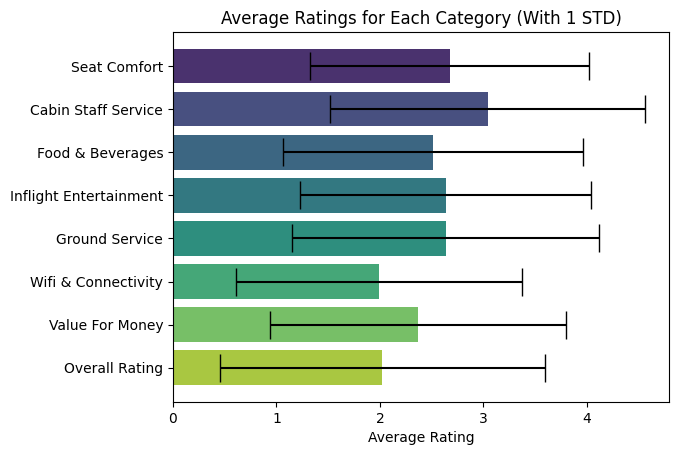

In [11]:
# Means visualised 
sns.barplot(x=means, y=stats.columns, orient='h', palette='viridis')
plt.errorbar(means, stats.columns, xerr=std, fmt='none', ecolor='black', capsize=10)
plt.xlabel('Average Rating')
plt.title('Average Ratings for Each Category (With 1 STD)')

Text(0.5, 1.0, 'Median Ratings for Each Category (With 1 STD)')

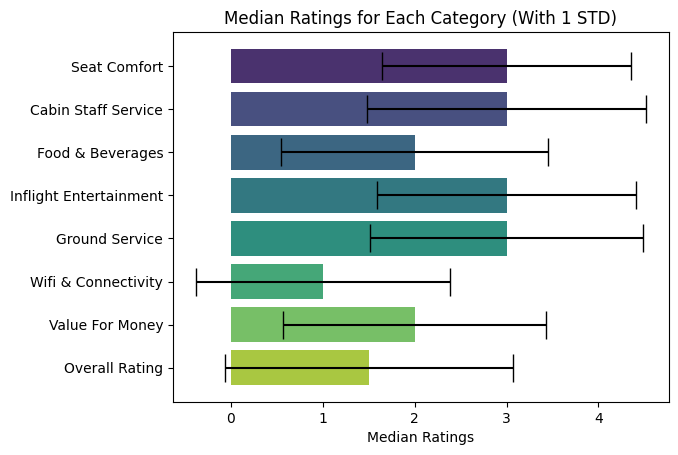

In [12]:
# Medians visualised
sns.barplot(x=medians, y=stats.columns, orient='h', palette='viridis')
plt.errorbar(medians, stats.columns, xerr=std, fmt='none', ecolor='black', capsize=10)
plt.xlabel('Median Ratings')
plt.title('Median Ratings for Each Category (With 1 STD)')

Text(0.5, 1.0, 'Distribution of Overall Ratings')

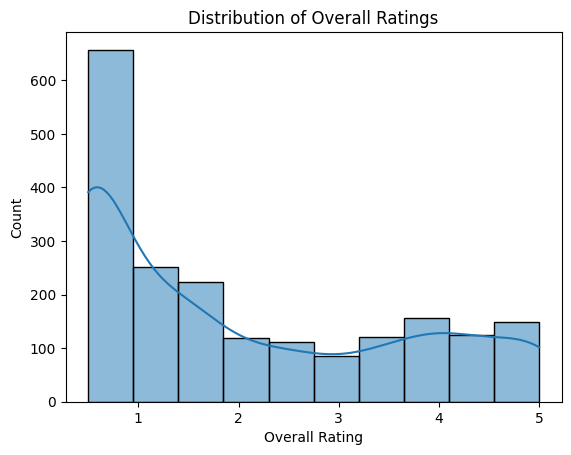

In [13]:
# Distribution of the Overall Rating. KDE gives us a continuous curve that represents the disribution of the data.
sns.histplot(stats['Overall Rating'], bins=10, kde=True)
plt.title('Distribution of Overall Ratings')